In [ ]:
#Ejecuta la red. ¿Qué notas?

#El modelo es malo y no está aprendiendo los patrones en el conjunto de datos.



#Ahora, aumenta el número de neuronas en la capa oculta e intenta cambiar la función de activación a una que no sea “lineal”. ¿Puedes modelar los datos ahora? ¿Cuántas neuronas y qué funciones de activación te permiten modelar los datos de manera efectiva?

# Con 3 neuronas en la capa oculta con una función de activación de relu modelan los datos, con una pérdida de prueba de aproximadamente 0,29 con bastante rapidez.



#Siéntete libre de añadir más neuronas, capas, o cambiar cualquier cosa que quieras. ¿Puedes modelar los datos para que la pérdida de prueba sea igual o menor a 0,01? ¿Cuál es el menor número de neuronas y capas que puedes usar, que dé una pérdida de prueba igual o menor a 0,01?

# Con 2 capas ocultas, cada una con 3 neuronas, usando una función de activación de relu 




#Juega con la tasa de aprendizaje. ¿Qué notas? Basándote en esto, ¿Cuál crees que es la tasa de aprendizaje?
#Es la tasa que controla qué tan rápido converge el modelo o encuentra la pérdida más baja. Las tasas de aprendizaje más pequeñas tardan mucho en converger, mientras que las tasas de aprendizaje demasiado grandes no encuentran la solución óptima.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/CÓDIGO/SEMANA FINAL/train (1).csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
test = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/CÓDIGO/SEMANA FINAL/test (1).csv')
test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler

In [11]:
scaler_features = MinMaxScaler()
scaler_predict = MinMaxScaler()

In [12]:
#entrenamiento

train_data = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/CÓDIGO/SEMANA FINAL/train (1).csv')
train_data = train_data.drop("Id", axis=1)
train_target = train_data["SalePrice"]
train_data = train_data.drop("SalePrice", axis=1)

In [13]:
#testeo
test_data = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/CÓDIGO/SEMANA FINAL/test (1).csv')
test_id = test_data["Id"]
test_data = test_data.drop("Id", axis=1)

In [14]:
houses = pd.concat([train_data,test_data], sort = False)

In [15]:
houses['MSSubClass'] = houses['MSSubClass'].astype(str)

In [16]:
houses = pd.get_dummies(houses)
houses = houses.fillna(houses.mean())
scaler_features = scaler_features.fit(houses.values)
train_data = houses[:len(train_data.index)]
test_data = houses[len(train_data.index):]

In [17]:
#normalizar datos
test_data = pd.DataFrame(scaler_features.transform(test_data.values), columns=test_data.columns)
train_data = pd.DataFrame(scaler_features.transform(train_data.values), columns=train_data.columns)
train_target = pd.DataFrame(scaler_predict.fit_transform(train_target.values.reshape(-1,1)), columns=["SalePrice"])
x = train_data
y = train_target
test_x = test_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


Epoch 1/500
46/46 [==============================] - 3s 12ms/step - loss: 0.0240 - mae: 0.1020 - accuracy: 0.0014
Epoch 2/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0025 - mae: 0.0337 - accuracy: 0.0014
Epoch 3/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0014 - mae: 0.0265 - accuracy: 0.0014
Epoch 4/500
46/46 [==============================] - 1s 13ms/step - loss: 8.4892e-04 - mae: 0.0207 - accuracy: 0.0014
Epoch 5/500
46/46 [==============================] - 0s 9ms/step - loss: 6.5290e-04 - mae: 0.0180 - accuracy: 0.0014
Epoch 6/500
46/46 [==============================] - 0s 9ms/step - loss: 4.7317e-04 - mae: 0.0155 - accuracy: 0.0014
Epoch 7/500
46/46 [==============================] - 0s 9ms/step - loss: 3.8024e-04 - mae: 0.0138 - accuracy: 0.0014
Epoch 8/500
46/46 [==============================] - 1s 11ms/step - loss: 3.4602e-04 - mae: 0.0137 - accuracy: 0.0014
Epoch 9/500
46/46 [==============================] - 0s 9ms/step - loss: 

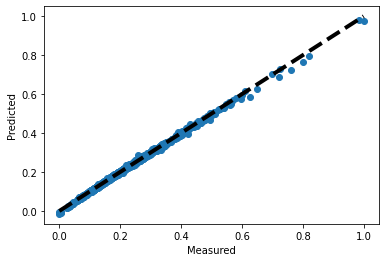

In [18]:
#red neurnal
hidden = 303
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=hidden, input_dim=len(x.columns), activation="relu"))
    model.add(tf.keras.layers.Dense(units=hidden, activation="relu"))
    model.add(tf.keras.layers.Dense(units=hidden, activation="relu"))
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_model, batch_size=32,epochs=500)

results=regressor.fit(x,y)

y_pred= regressor.predict(x)

fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
test_pred = regressor.predict(test_x)
test_pred = test_pred.reshape(-1,1)
output = pd.DataFrame(test_id,columns=["Id"])
output["SalePrice"] = scaler_predict.inverse_transform(test_pred)
output.to_csv('/content/drive/My Drive/CodingDojo/Week11/sumit.csv', index = None)